<a href="https://colab.research.google.com/github/marcelolucas11/SDSS-peak-double-target-analysis/blob/main/future_targets_for_LSST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import pandas as pd
import seaborn as sns
import csv
import astropy.constants as const


In [ ]:
#@title Importa a Tabela
from google.colab import files
import io

supersample=('lsst_thaisa_supersample.csv')
alvos=('lsst_alvos_duplos_picos.csv')

In [ ]:

Zall=np.loadtxt('lsst_thaisa_supersample.csv', usecols=7, dtype='float', unpack=True, delimiter=';' )

MAG_apa_all=np.loadtxt('lsst_thaisa_supersample.csv', usecols=9, dtype='float', unpack=True, delimiter=';' )

Zalvos=np.loadtxt('lsst_alvos_duplos_picos.csv', usecols=7, dtype='float', unpack=True, delimiter=';' )

MAG_apa_alvos=np.loadtxt('lsst_alvos_duplos_picos.csv', usecols=9, dtype='float', unpack=True, delimiter=';' )

SNR_alvos=np.loadtxt('lsst_alvos_duplos_picos.csv', usecols=8, dtype='float', unpack=True, delimiter=';' )

SNR_all=np.loadtxt('lsst_thaisa_supersample.csv', usecols=8, dtype='float', unpack=True, delimiter=';' )


#SNR.to_csv('SNR_alvos.csv', sep=';')     #baixa a lista de MAG Absoluta


#print(SNR)
#print(Zall, MAG_apa_all, Zalvos, MAG_apa_alvos)
print(Zalvos)
print(Zall)

[8.50000000e-02 1.37728000e-01 2.39767000e-01 1.71875000e-01
 1.72806000e-01 1.70873000e-01 2.39933000e-01 1.80027000e-01
 1.21836000e-01 1.73906000e-01 3.01766000e-01 8.62720000e-02
 1.17217000e-01 2.52438000e-01 1.29510000e-01 2.93000000e+02
 2.78000000e-01 2.93000000e-01 1.66000000e-01 3.88000000e-01
 1.65000000e-01 2.44000000e-01 3.60000000e-01 1.43000000e-01
 5.48061311e-01 9.20000000e-02 1.44000000e-01 1.18000000e-01
 1.74634352e-01 3.00468832e-01 3.87610227e-01 2.08000000e-01
 2.46600000e-01 1.82019845e-01 1.55389518e-01 3.60195756e-01
 2.55401075e-01 1.18000000e-01 4.28012937e-01 3.09000000e-01
 2.61615068e-01 3.05373102e-01 3.81000000e-01 2.51966685e-01
 1.08000000e-01 9.60000000e-02 1.58910304e-01 1.32000000e-01
 2.01700523e-01 1.25905186e-01 3.58355224e-01 2.67000000e-01
 1.37000000e-01 5.37075400e-01 3.39961320e-01 5.29840589e-01
 1.94355935e-01 3.37499052e-01 2.45679513e-01 2.93198407e-01
 2.75621444e-01 1.64242491e-01 1.17047988e-01 3.12443465e-01
 3.03325713e-01 2.868602

In [ ]:
cosmo = FlatLambdaCDM(H0=70, Tcmb0=2.725, Om0=0.3)         #Simula um universo plano e usa as constantes de Hubble e Densidade de matéria
cosmo.luminosity_distance(Zalvos)                               #dL Distância de Luminosidade

dlalvos=cosmo.luminosity_distance(Zalvos)      #distância de lumionosidade alvos LSST


#M = m(rMAG) - 5log(dL / 10 pc)

MAG_abs_alvos= MAG_apa_alvos-5*np.log10((dlalvos/(10*u.pc)))                           #convertendo Magnitude Aparente em Magnitude Absoluta

dlalvos=dlalvos.value


print(MAG_abs_alvos)

print(dlalvos)


#magnitude.to_csv('abs_rMAG_all_population.csv', sep=';')     #baixa a lista de MAG Absoluta

[   -20.31296687    -21.62735044    -22.80840196    -23.91222799
    -22.06718921    -22.89903375    -22.72708135    -22.9642562
    -21.75787575    -22.05402313    -23.64861929    -21.45376169
    -22.96915888    -21.83926769 -10037.91878708    -40.07721559
    -22.06937491    -22.02163065    -22.02005708    -24.51577421
    -22.68359242    -21.75029012    -22.95629033    -21.2260451
    -24.0855132     -20.06132373    -21.56902829    -20.56028299
    -20.94552105    -22.62645512    -23.7052374     -21.80858908
    -22.51967587    -22.41030037    -21.12870793    -23.24640916
    -21.85159531    -20.01107099    -25.09316713    -23.27799088
    -22.61329717    -22.69781592    -23.39747089    -21.93499636
    -20.92178843    -19.95632132    -21.40265061    -20.9206683
    -22.35773358    -21.38202164    -23.60242249    -22.8651742
    -21.54330324    -23.64088291    -23.49870578    -25.18980995
    -21.59542239    -22.76446353    -23.02184904    -22.80191194
    -23.14031801    -21.71367

In [ ]:
cosmo = FlatLambdaCDM(H0=70, Tcmb0=2.725, Om0=0.3)         #Simula um universo plano e usa as constantes de Hubble e Densidade de matéria
cosmo.luminosity_distance(Zall)                               #dL Distância de Luminosidade


dlall=cosmo.luminosity_distance(Zall)          #distância de luminosidade amostra total
#M = m(rMAG) - 5log(dL / 10 pc)

MAG_abs_all= MAG_apa_all-5*np.log10((dlall/(10*u.pc)))                           #convertendo Magnitude Aparente em Magnitude Absoluta


print(MAG_abs_all)
print(dlall)

#magnitude.to_csv('abs_rMAG_all_population.csv', sep=';')     #baixa a lista de MAG Absoluta



[-24.29457873 -25.25313613 -24.13781524 ... -23.82922425 -23.67729277
 -25.82370213]
[2694.60769962 4277.21643298 3813.20406737 ... 3387.85216293 2746.26571322
 5248.19092647] Mpc


Histograma de Magnitude Absoluta

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequência')

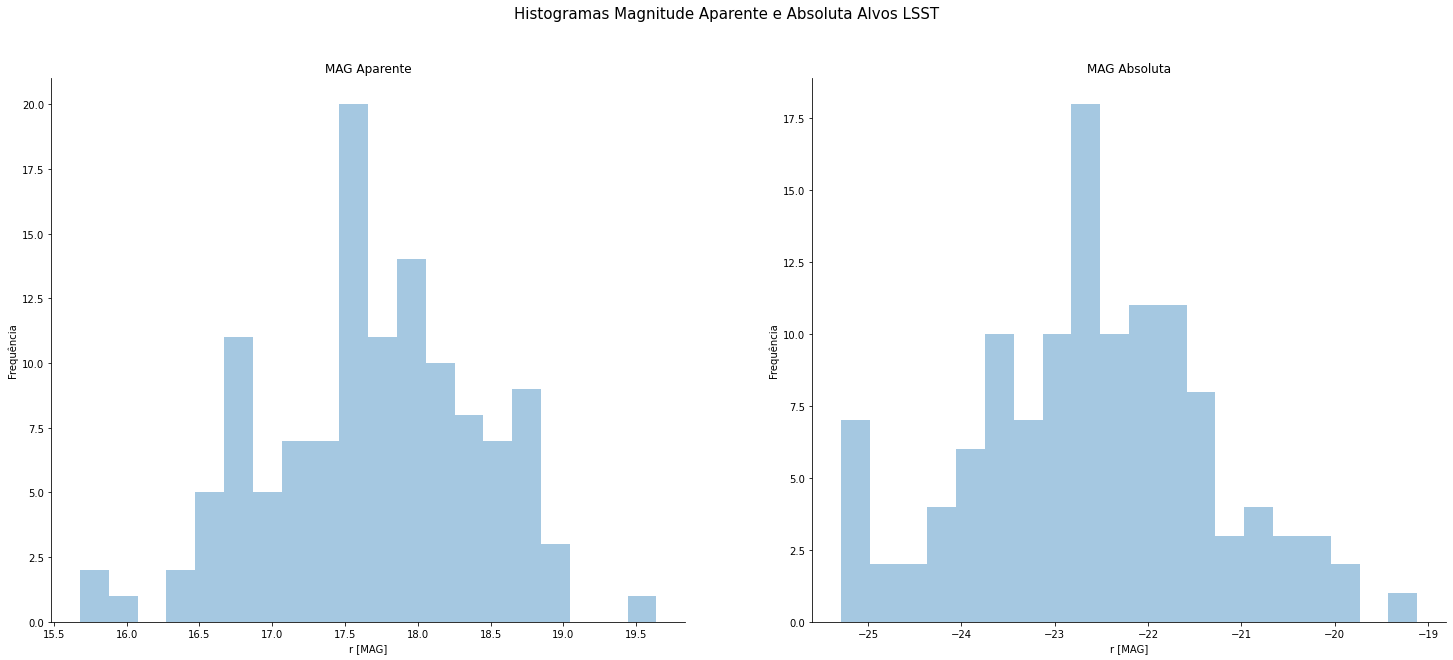

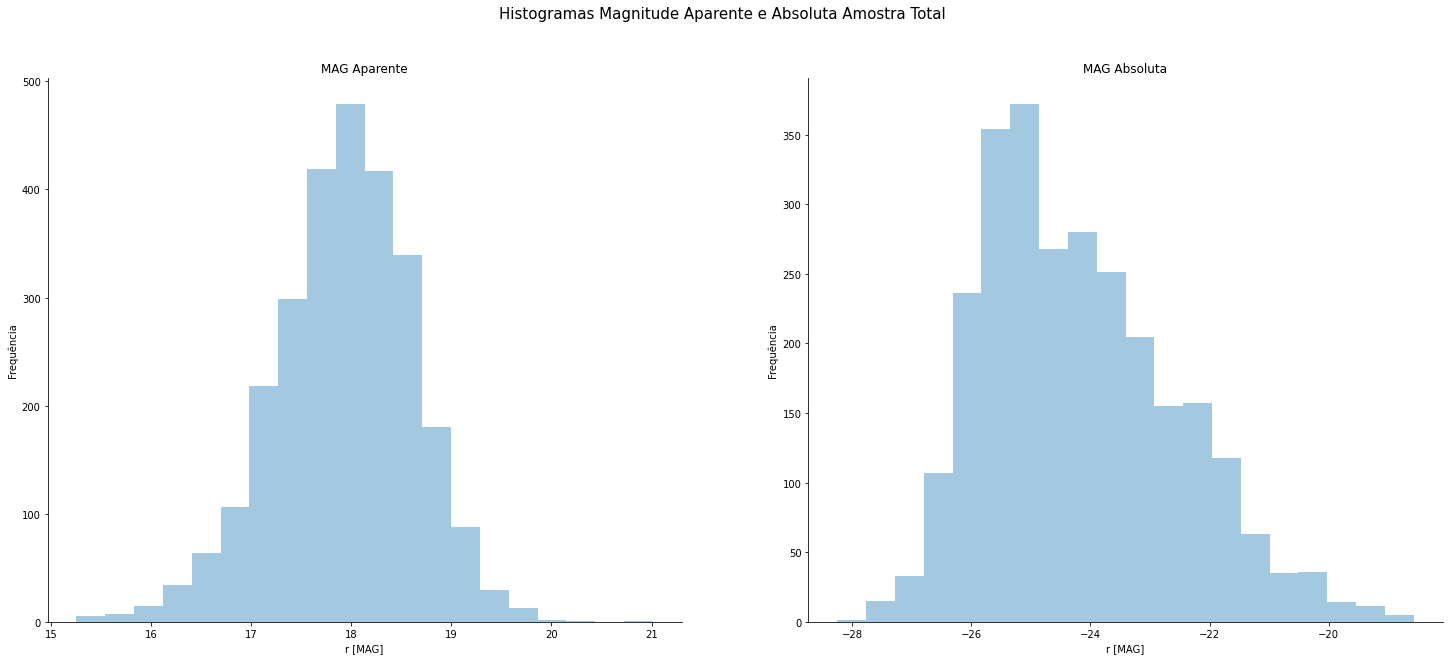

In [ ]:
######################## Magnitude Absoluta alvos LSST
#magnitude[magnitude==np.min(magnitude)]=np.nan
MAG_abs_alvos[MAG_abs_alvos<=-40.]=np.nan            # A tabela está como rMAG, mas é Magnitude Absoluta

#print(MAG_abs_alvos)   

############################ Magnitude Aparente ALVOS LSST
MAG_apa_alvos[MAG_apa_alvos<-2000.]=np.nan


############################## Histogramas MAG alvos LSST


f, (ax1,ax2)=plt.subplots(1,2,figsize=(25,10))

sns.distplot(MAG_apa_alvos ,kde=False, hist= True, bins=20, ax=ax1);
sns.distplot(MAG_abs_alvos ,kde=False, hist= True, bins=20, ax=ax2);        #kde (contorno e muda o y para densidade),                                                                    
sns.despine(f)                                                                  ## rug (coloca os pontos de registro), hist (plota o histograma)

plt.suptitle('Histogramas Magnitude Aparente e Absoluta Alvos LSST', size=15)
ax1.set_title('MAG Aparente')
ax1.set_xlabel('r [MAG]')
ax1.set_ylabel('Frequência')

ax2.set_title('MAG Absoluta')
ax2.set_xlabel('r [MAG]')
ax2.set_ylabel('Frequência')


############################## Histogramas MAG Amostra Total

f, (ax3,ax4)=plt.subplots(1,2,figsize=(25,10))

######################## Magnitude Absoluta total
#magnitude[magnitude==np.min(magnitude)]=np.nan
MAG_abs_all[MAG_abs_all<-1000.]=np.nan

#print(MAG_abs_all)                                                # A tabela está como rMAG, mas é Magnitude Absoluta


############################ Magnitude Aparente total
#fig, ax2=plt.subplots()
MAG_apa_all[MAG_apa_all<-2000.]=np.nan


############################## Histogramas MAG

sns.distplot(MAG_apa_all ,kde=False, hist= True, bins=20, ax=ax3);
sns.distplot(MAG_abs_all ,kde=False, hist= True, bins=20, ax=ax4);        #kde (contorno), rug=True (coloca os pontos de registro), hist (plota o histograma)
sns.despine(f)

plt.suptitle('Histogramas Magnitude Aparente e Absoluta Amostra Total', size=15)
ax3.set_title('MAG Aparente Amostra Total')
ax3.set_title('MAG Aparente')
ax3.set_xlabel('r [MAG]')
ax3.set_ylabel('Frequência')

ax4.set_title('MAG Absoluta Amostra Total')
ax4.set_title('MAG Absoluta')
ax4.set_xlabel('r [MAG]')
ax4.set_ylabel('Frequência')



Histograma de Redshift

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequência')

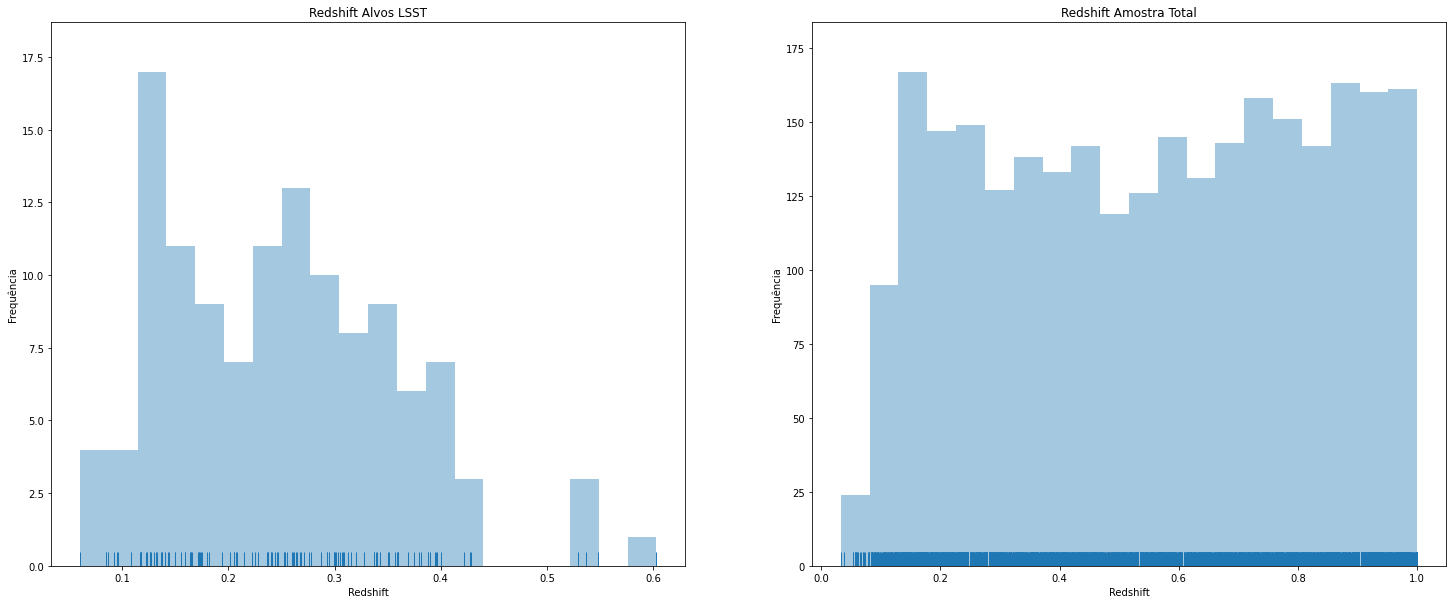

In [ ]:
#print(Zalvos)            #Z é Redshift
Zalvos[Zalvos>50.]=np.nan

################################
f, (ax5,ax6)=plt.subplots(1,2,figsize=(25,10))


sns.distplot(Zalvos ,kde=False, rug= True, hist= True, bins=20, ax=ax5);
ax5.set_title('Redshift Alvos LSST')
ax5.set_xlabel('Redshift')
ax5.set_ylabel('Frequência')

##################################

sns.distplot(Zall ,kde=False, rug= True, hist= True, bins=20, ax=ax6);
ax6.set_title('Redshift Amostra Total')
ax6.set_xlabel('Redshift')
ax6.set_ylabel('Frequência')

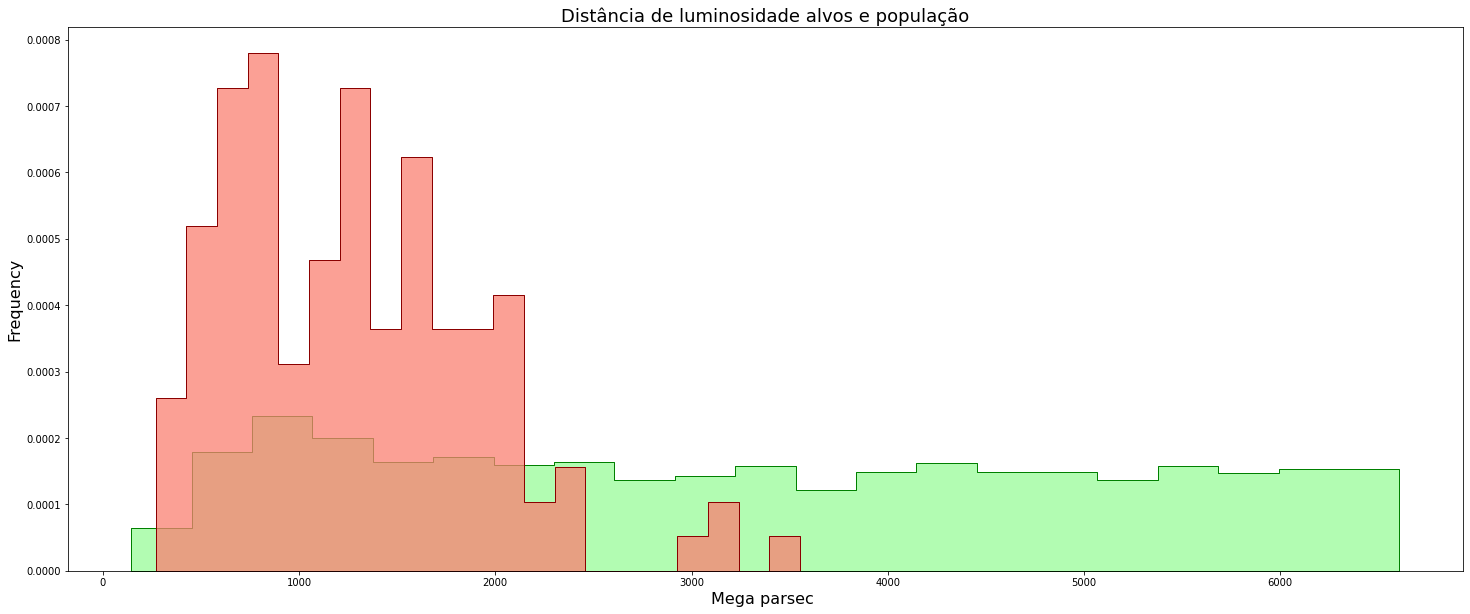

In [ ]:
#dlall=dlall.value

dlalvos[dlalvos>5000.]=np.nan


plt.subplots(figsize=(25,10))


sns.histplot(data=dlall,kde=False, bins=21, element="step",color='palegreen',edgecolor='green' ,fill=True, stat="density")                      #stat="density"


sns.histplot(data=dlalvos,kde=False, bins=21, element="step",color='salmon',edgecolor='darkred',fill=True, stat="density")


plt.title('Distância de luminosidade alvos e população', fontsize=18)
plt.xlabel('Mega parsec ', fontsize=16) #Mega Parsec
plt.ylabel('Frequency', fontsize=16)

plt.show()
#pq não estamos vendo duplos picos mais longe

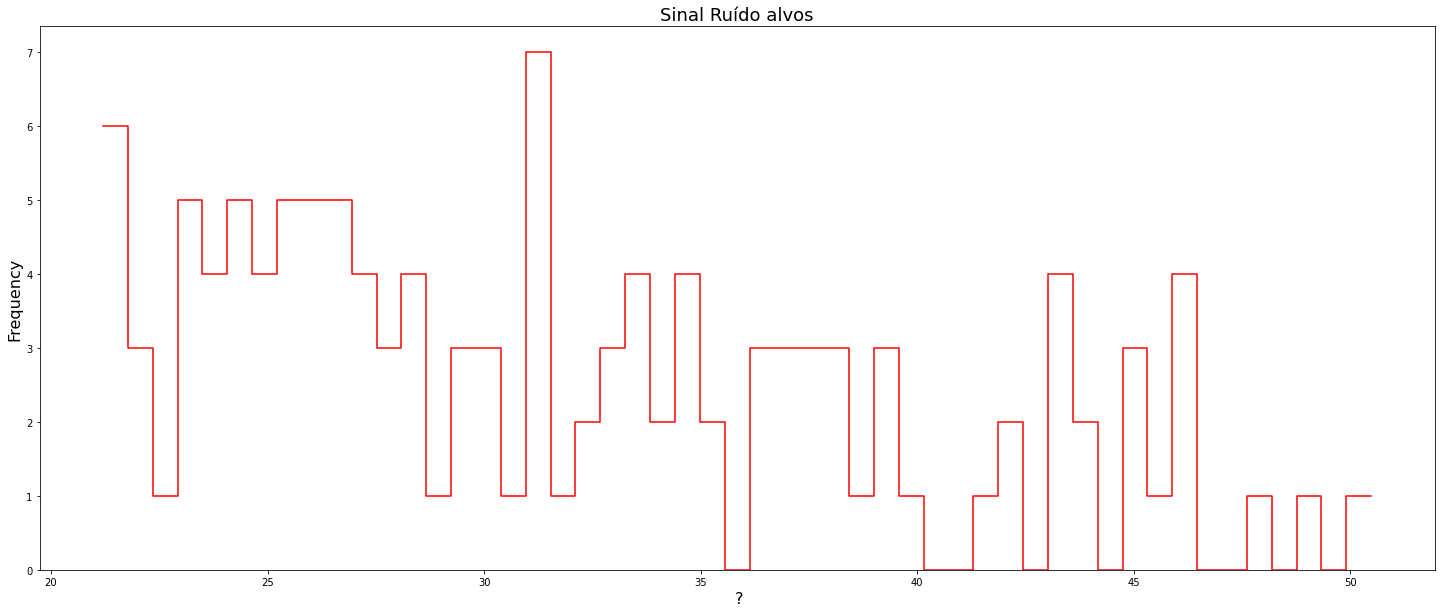

In [ ]:
plt.subplots(figsize=(25,10))


sns.histplot(data=SNR_alvos,kde=False, bins=51, element="step",color='red',fill=False)

plt.title('Sinal Ruído alvos', fontsize=18)
plt.xlabel(' ?', fontsize=16) #parsec ?
plt.ylabel('Frequency', fontsize=16)

plt.show()

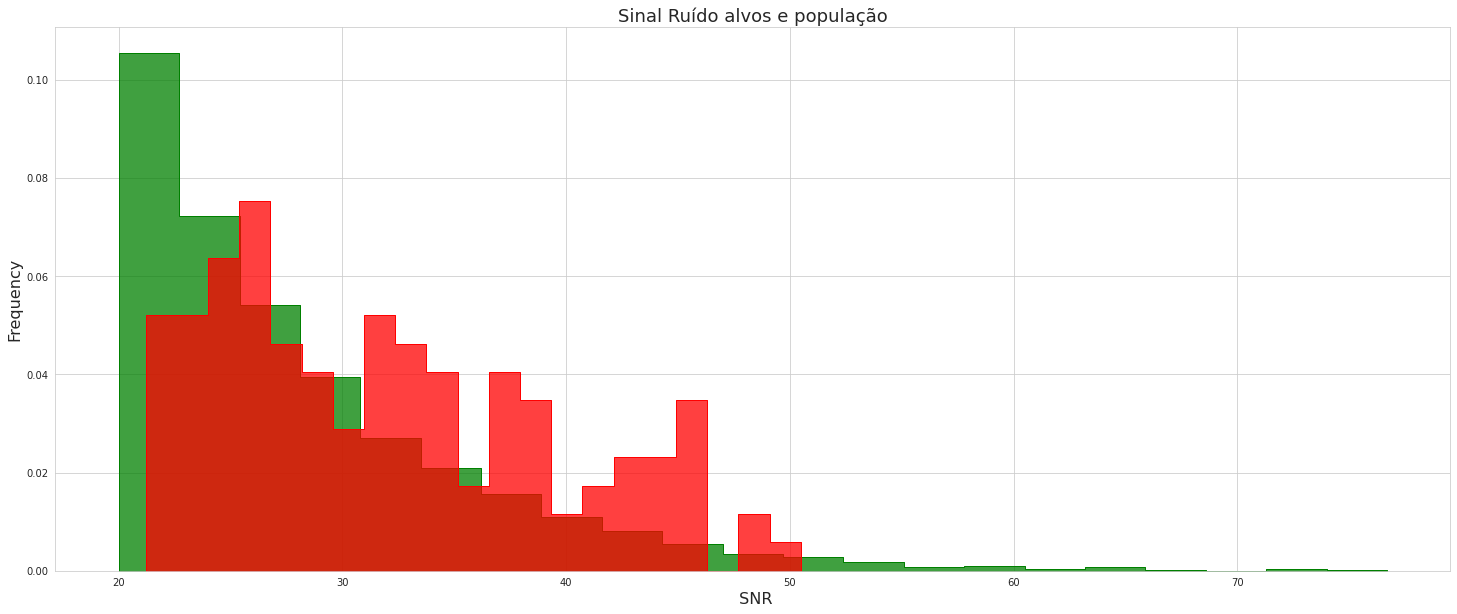

In [ ]:
plt.subplots(figsize=(25,10))

sns.histplot(data=SNR_all,kde=False, bins=21, element="step",color='green', fill=True, stat="density")


sns.histplot(data=SNR_alvos,kde=False, bins=21, element="step",color='red',fill=True, stat="density")

plt.title('Sinal Ruído alvos e população', fontsize=18)
plt.xlabel(' SNR', fontsize=16) #parsec ?
plt.ylabel('Frequency', fontsize=16)

plt.show()
print()

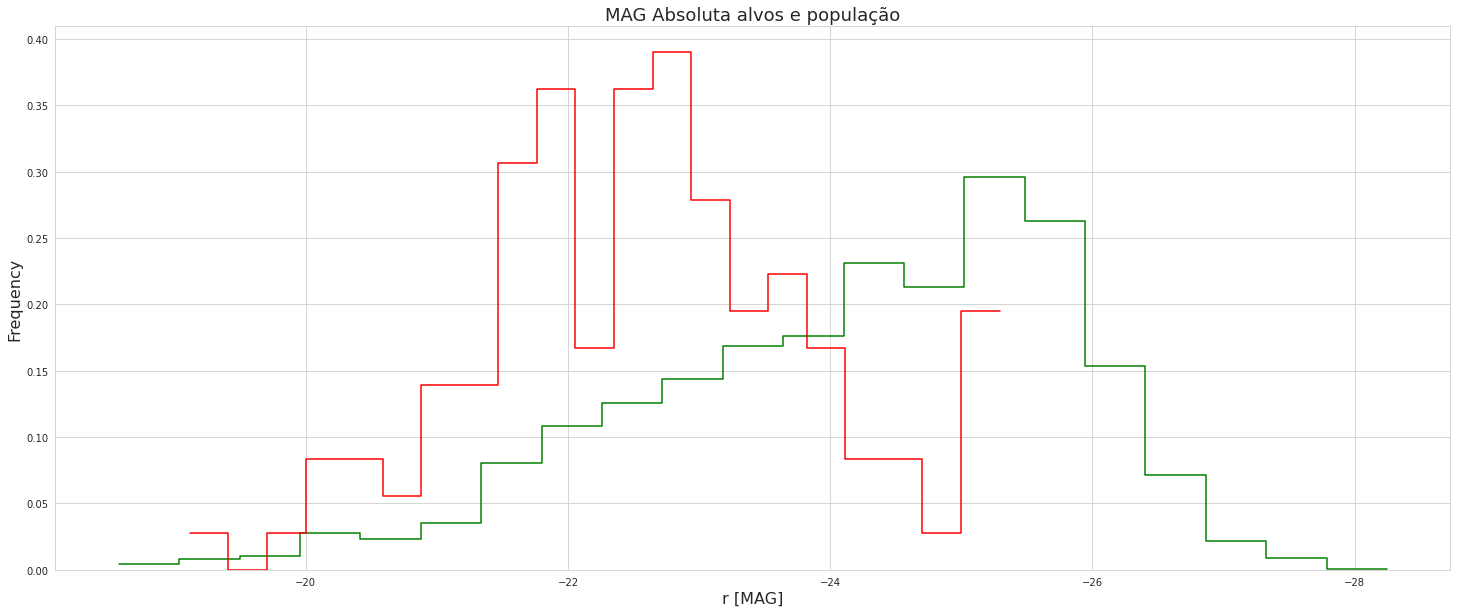

In [ ]:
plt.subplots(figsize=(25,10))

sns.histplot(data=MAG_abs_all,kde=False, bins=21, element="step",color='green', fill=False, stat="density")


sns.histplot(data=MAG_abs_alvos,kde=False, bins=21, element="step",color='red',fill=False, stat="density")

#plt.xlim(15.5,20.5)

plt.xlim(reversed(plt.xlim()))
plt.title('MAG Absoluta alvos e população', fontsize=18)
plt.xlabel('r [MAG]', fontsize=16) #parsec ?
plt.ylabel('Frequency', fontsize=16)

plt.show()
#salvar este plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Redshift')

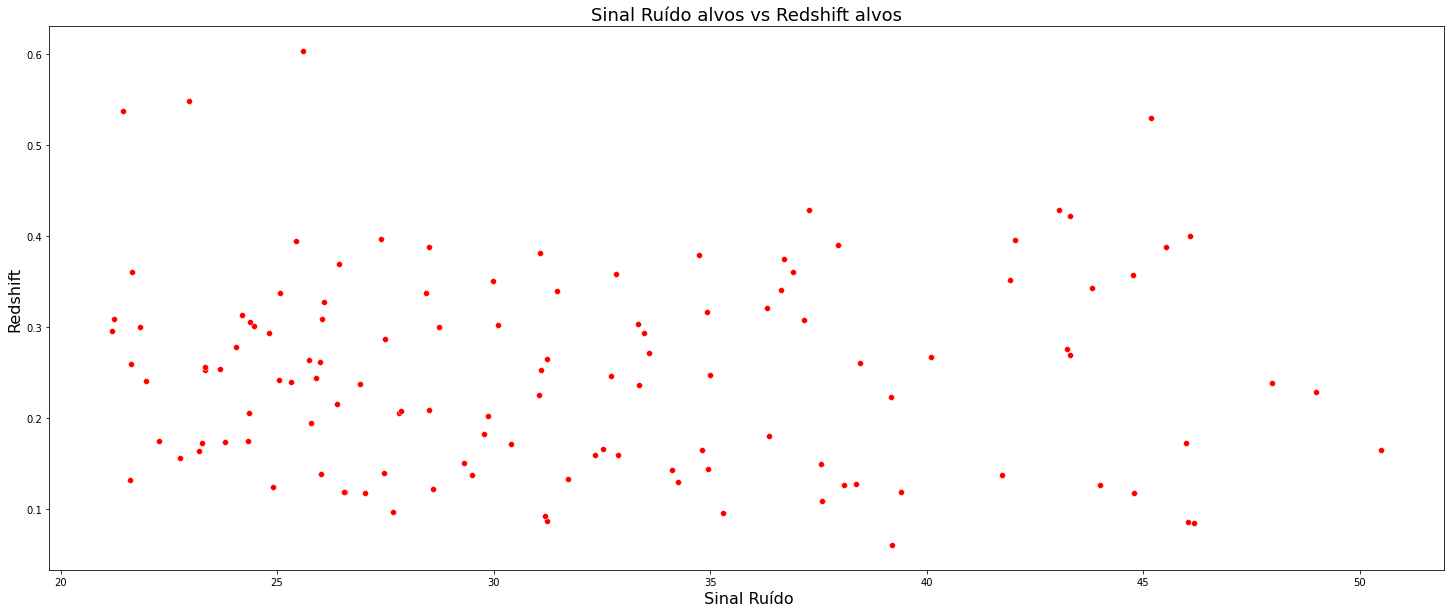

In [ ]:
#sns.set_theme(style="whitegrid")

plt.subplots(figsize=(25,10))

#sns.lineplot(Zalvos,SNR_alvos)

sns.scatterplot(SNR_alvos,Zalvos, color='red')

plt.title('Sinal Ruído alvos vs Redshift alvos', fontsize=18)
plt.xlabel(' Sinal Ruído', fontsize=16) #parsec ?
plt.ylabel('Redshift', fontsize=16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Redshift')

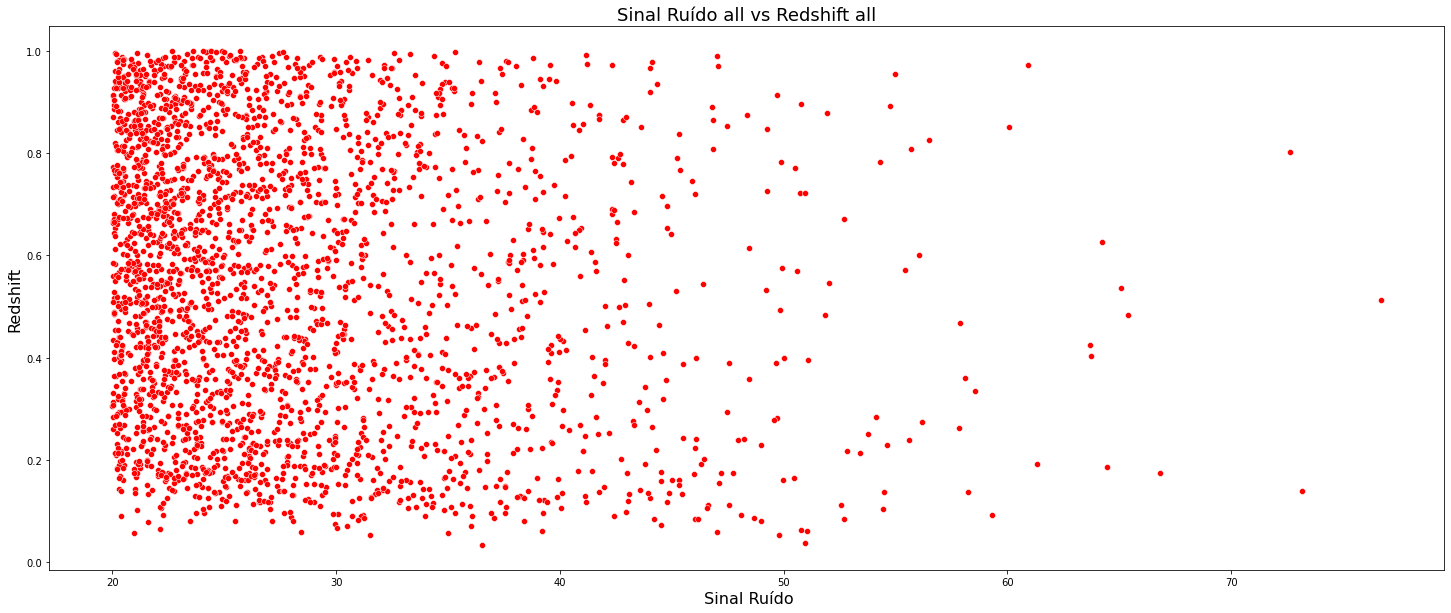

In [ ]:
plt.subplots(figsize=(25,10))

#sns.lineplot(Zalvos,SNR_alvos)

sns.scatterplot(SNR_all,Zall, color='red')

plt.title('Sinal Ruído all vs Redshift all', fontsize=18)
plt.xlabel(' Sinal Ruído', fontsize=16) #parsec ?
plt.ylabel('Redshift', fontsize=16)